In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("../prepared_ravdess_features.csv")

In [4]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [5]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'sex', 'frame_width', 'length_ms', 'zero_crossings_sum',
       'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_mean', 'stft_std',
       'stft_min', 'stft_kur', 'stft_skew', 'mean', 'std', 'min', 'max', 'kur',
       'skew'],
      dtype='object')

In [6]:
# eliminazione variabili con tanti valori costanti e inutili
to_delete=["frame_width","mfcc_mean","mfcc_std","mfcc_min","mfcc_max","sc_mean","sc_std","sc_min","sc_max","sc_kur","sc_skew","stft_mean","stft_std","stft_min","stft_kur","stft_skew"]

df_clean=df.copy()
df_clean=df_clean.drop(to_delete,axis=1)


to_delete2=["statement","repetition"]
df_clean=df_clean.drop(to_delete2,axis=1)
df_clean

,vocal_channel,emotion,emotional_intensity,sex,length_ms,zero_crossings_sum,mean,std,min,max,kur,skew
0,speech,fearful,normal,F,3737,16995,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,F,3904,13906,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,speech,happy,strong,F,4671,18723,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,F,3637,11617,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,F,4404,15137,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...
2412,speech,calm,strong,M,4605,9871,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2413,speech,calm,normal,M,4171,8963,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2414,song,sad,strong,M,5239,9765,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2415,speech,surprised,normal,M,3737,9716,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


In [7]:
df_clean["length_ms_BIN"] = pd.qcut(df_clean["length_ms"], 4)
df_clean["zero_crossings_sum_BIN"] = pd.qcut(df_clean["zero_crossings_sum"], 4)
df_clean["mean_BIN"] = pd.qcut(df_clean["mean"], 4)
df_clean["std_BIN"] = pd.qcut(df_clean["std"], 4)
df_clean["min_BIN"] = pd.qcut(df_clean["min"], 4)
df_clean["max_BIN"] = pd.qcut(df_clean["max"], 4)
df_clean["kur_BIN"] = pd.qcut(df_clean["kur"], 4)
df_clean["skew_BIN"] = pd.qcut(df_clean["skew"], 4)

df_clean=df_clean.drop(["length_ms","zero_crossings_sum","mean","std","min","max","kur","skew"],axis=1)



df_clean["length_ms_BIN"] = df_clean["length_ms_BIN"].astype(str) + "_Length"
df_clean["zero_crossings_sum_BIN"] = df_clean["zero_crossings_sum_BIN"].astype(str) + "_Zcs"
df_clean["mean_BIN"] = df_clean["mean_BIN"].astype(str) + "_Mean"
df_clean["std_BIN"] = df_clean["std_BIN"].astype(str) + "_Std"
df_clean["min_BIN"] = df_clean["min_BIN"].astype(str) + "_Min"
df_clean["max_BIN"] = df_clean["max_BIN"].astype(str) + "_Max"
df_clean["kur_BIN"] = df_clean["kur_BIN"].astype(str) + "_Kur"
df_clean["skew_BIN"] = df_clean["skew_BIN"].astype(str) + "_Skew"
df_clean["vocal_channel"] = df_clean["vocal_channel"].astype(str) + "_Vc"
df_clean["emotion"] = df_clean["emotion"].astype(str) + "_Emotion"
df_clean["emotional_intensity"] = df_clean["emotional_intensity"].astype(str) + "_Intensity"




df_clean

,vocal_channel,emotion,emotional_intensity,sex,length_ms_BIN,zero_crossings_sum_BIN,mean_BIN,std_BIN,min_BIN,max_BIN,kur_BIN,skew_BIN
0,speech_Vc,fearful_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(14959.0, 30153.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew"
1,speech_Vc,angry_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(12379.0, 14959.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.0139, 0.0262]_Std","(-1.0, -0.203]_Min","(0.225, 0.999]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew"
2,speech_Vc,happy_Emotion,strong_Intensity,F,"(4538.0, 6373.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0139, 0.0262]_Std","(-0.203, -0.104]_Min","(0.109, 0.225]_Max","(1.7570000000000001, 6.53]_Kur","(0.263, 1.8]_Skew"
3,speech_Vc,surprised_Emotion,normal_Intensity,F,"(3604.0, 4004.0]_Length","(10359.0, 12379.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew"
4,song_Vc,happy_Emotion,strong_Intensity,F,"(4004.0, 4538.0]_Length","(14959.0, 30153.0]_Zcs","(8.37e-07, 0.00122]_Mean","(0.0262, 0.152]_Std","(-0.203, -0.104]_Min","(0.225, 0.999]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew"
...,...,...,...,...,...,...,...,...,...,...,...,...
2412,speech_Vc,calm_Emotion,strong_Intensity,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(8.37e-07, 0.00122]_Mean","(-0.000348, 0.00677]_Std","(-0.0544, -0.00613]_Min","(0.0036699999999999997, 0.0554]_Max","(6.53, 9.834]_Kur","(0.263, 1.8]_Skew"
2413,speech_Vc,calm_Emotion,normal_Intensity,M,"(4004.0, 4538.0]_Length","(4720.999, 10359.0]_Zcs","(-9.8e-08, 8.37e-07]_Mean","(0.00677, 0.0139]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(14.095, 59.086]_Kur","(0.263, 1.8]_Skew"
2414,song_Vc,sad_Emotion,strong_Intensity,M,"(4538.0, 6373.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(0.0139, 0.0262]_Std","(-0.104, -0.0544]_Min","(0.0554, 0.109]_Max","(1.7570000000000001, 6.53]_Kur","(-0.338, 0.00195]_Skew"
2415,speech_Vc,surprised_Emotion,normal_Intensity,M,"(3604.0, 4004.0]_Length","(4720.999, 10359.0]_Zcs","(-0.001944, -1.41e-06]_Mean","(-0.000348, 0.00677]_Std","(-0.104, -0.0544]_Min","(0.0036699999999999997, 0.0554]_Max","(9.834, 14.095]_Kur","(-0.338, 0.00195]_Skew"


In [8]:
# Creazione basket di transazioni

X=df_clean.values.tolist()
X[2]

['speech_Vc',
 'happy_Emotion',
 'strong_Intensity',
 'F',
 '(4538.0, 6373.0]_Length',
 '(14959.0, 30153.0]_Zcs',
 '(8.37e-07, 0.00122]_Mean',
 '(0.0139, 0.0262]_Std',
 '(-0.203, -0.104]_Min',
 '(0.109, 0.225]_Max',
 '(1.7570000000000001, 6.53]_Kur',
 '(0.263, 1.8]_Skew']

# Pattern Mining

In [9]:
#!pip install pyfim
from fim import apriori


# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

In [10]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

Frequent itemsets

In [11]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S") #target= frquent/closed/maximal/rules, report=S 
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])


,frequent_itemset,support
0,"((4538.0, 6373.0]_Length, song_Vc)",20.893670
1,"((3604.0, 4004.0]_Length, speech_Vc)",23.334712
2,"((0.0262, 0.152]_Std, (0.225, 0.999]_Max)",21.597021
3,"((0.0262, 0.152]_Std, (0.225, 0.999]_Max, (-1....",20.935043
4,"((0.0262, 0.152]_Std, (-1.0, -0.203]_Min)",21.928010
5,"((0.0262, 0.152]_Std, strong_Intensity)",20.148945
6,"((9.834, 14.095]_Kur, speech_Vc)",20.148945
7,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",22.672735
8,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",20.066198
9,"((-0.0544, -0.00613]_Min, (-0.000348, 0.00677]...",21.431527


Closed Itemsets

In [12]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S") #target= frquent/closed/maximal/rules, report=S 
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((4538.0, 6373.0]_Length, song_Vc)",20.893670
1,"((3604.0, 4004.0]_Length, speech_Vc)",23.334712
2,"((0.0262, 0.152]_Std, (0.225, 0.999]_Max)",21.597021
3,"((0.0262, 0.152]_Std, (0.225, 0.999]_Max, (-1....",20.935043
4,"((0.0262, 0.152]_Std, (-1.0, -0.203]_Min)",21.928010
5,"((0.0262, 0.152]_Std, strong_Intensity)",20.148945
6,"((9.834, 14.095]_Kur, speech_Vc)",20.148945
7,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",22.672735
8,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",20.066198
9,"((-0.0544, -0.00613]_Min, (-0.000348, 0.00677]...",21.431527


Maximal Itemsets

In [13]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S") #target= frquent/closed/maximal/rules, report=S 
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])
#tmp=pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])
#tmp["maximal_itemset"][2]

,maximal_itemset,support
0,"((4538.0, 6373.0]_Length, song_Vc)",20.893670
1,"((3604.0, 4004.0]_Length, speech_Vc)",23.334712
2,"((0.0262, 0.152]_Std, (0.225, 0.999]_Max, (-1....",20.935043
3,"((0.0262, 0.152]_Std, strong_Intensity)",20.148945
4,"((9.834, 14.095]_Kur, speech_Vc)",20.148945
5,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",20.066198
6,"((0.0554, 0.109]_Max, (-0.104, -0.0544]_Min)",20.273066
7,"((14.095, 59.086]_Kur, speech_Vc)",23.376086
8,"((0.225, 0.999]_Max, strong_Intensity)",20.728175
9,"((0.109, 0.225]_Max, (-0.203, -0.104]_Min)",20.769549


Frequent pattern extraction and discuss frequent pattern

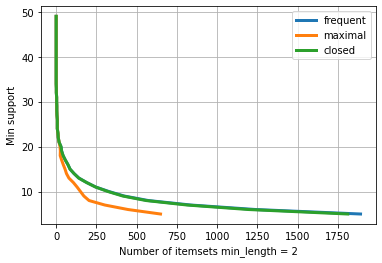

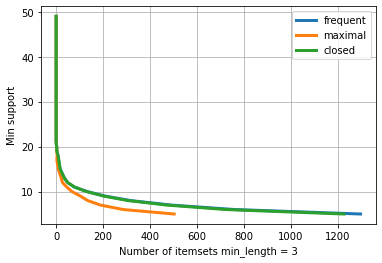

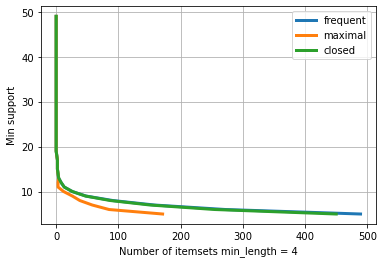

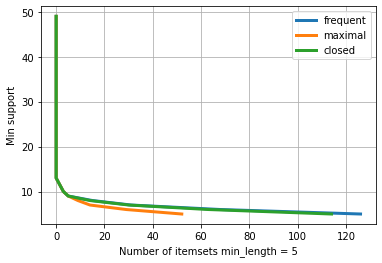

In [14]:
# Tuning maxsupp,zmin

support_new = [i for i in range(5, 50)]
type_apriori = {}
for ln in [2, 3, 4, 5]:
    type_apriori[ln] = {}
    for elem in ["s", "m", "c"]:
        itemset_ll = []
        for i in support_new:
            itemset = apriori(X, supp = i, zmin = ln, target = elem, report = "asS")
            itemset_ll.append(len(itemset))
        type_apriori[ln][elem] = itemset_ll

to_def = {"s": "frequent", "m": "maximal", "c": "closed"}
for i in [2, 3, 4, 5]:
    for el in ["s", "m", "c"]:
        tmp_len = type_apriori[i][el]
        plt.plot(tmp_len, support_new,label=to_def[el],lw=3)
    plt.xlabel("Number of itemsets min_length = " + str(i))#,fontsize=22)
    plt.ylabel("Min support")#,fontsize=22)
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
#check zmin=5 e maxsupp=10%

"""
c=0
for i,s in enumerate(df_tmp["frequent_itemset"]):
    for x in range(len(s)):
        print(s[x])
        c=c+1
print("Itemsets counts:",c)

"""

supp_tmp = 10
zmin_tmp = 5

itemsets = apriori(X, target="s", supp=supp_tmp, zmin=zmin_tmp, report="S") #target= frquent/closed/maximal/rules, report=S 
df_tmp=pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
df_tmp

for x in df_tmp["frequent_itemset"]:
    print(x)



('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(-1.0, -0.203]_Min', 'strong_Intensity', 'F')
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(-1.0, -0.203]_Min', 'strong_Intensity', 'speech_Vc')
('(-0.0544, -0.00613]_Min', '(0.0036699999999999997, 0.0554]_Max', '(-0.000348, 0.00677]_Std', 'normal_Intensity', 'speech_Vc')


In [16]:
#check zmin=3 e maxsupp=15%

"""
c=0
for i,s in enumerate(df_tmp["frequent_itemset"]):
    for x in range(len(s)):
        print(s[x])
        c=c+1
print("Itemsets counts:",c)

"""

supp_tmp = 15
zmin_tmp = 3

itemsets = apriori(X, target="s", supp=supp_tmp, zmin=zmin_tmp, report="S") #target= frquent/closed/maximal/rules, report=S 
df_tmp=pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
df_tmp

for x in df_tmp["frequent_itemset"]:
    print(x)

('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(-1.0, -0.203]_Min')
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(-1.0, -0.203]_Min', 'strong_Intensity')
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', 'strong_Intensity')
('(0.0262, 0.152]_Std', '(-1.0, -0.203]_Min', 'strong_Intensity')
('(-0.0544, -0.00613]_Min', '(0.0036699999999999997, 0.0554]_Max', '(-0.000348, 0.00677]_Std')
('(-0.0544, -0.00613]_Min', '(0.0036699999999999997, 0.0554]_Max', '(-0.000348, 0.00677]_Std', 'speech_Vc')
('(-0.0544, -0.00613]_Min', '(0.0036699999999999997, 0.0554]_Max', 'normal_Intensity')
('(-0.0544, -0.00613]_Min', '(0.0036699999999999997, 0.0554]_Max', 'speech_Vc')
('(-0.0544, -0.00613]_Min', '(-0.000348, 0.00677]_Std', 'normal_Intensity')
('(-0.0544, -0.00613]_Min', '(-0.000348, 0.00677]_Std', 'speech_Vc')
('(0.225, 0.999]_Max', '(-1.0, -0.203]_Min', 'strong_Intensity')
('(0.0036699999999999997, 0.0554]_Max', '(-0.000348, 0.00677]_Std', 'speech_Vc')
('(-0.000348, 0.00677]_Std', 'normal_Intensity', 's

Support vs number of itemsets

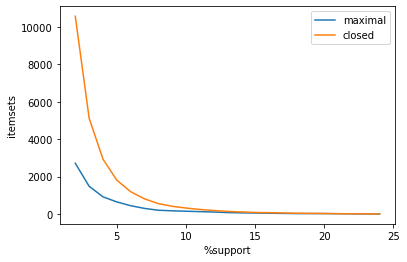

In [17]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

Support vs number of itemset for each emotion

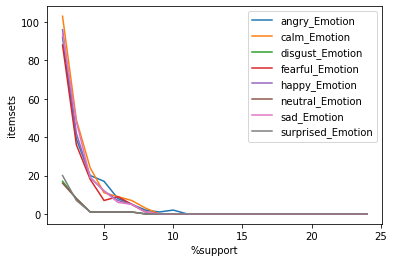

('neutral_Emotion', 'normal_Intensity')
('surprised_Emotion', 'speech_Vc')
('disgust_Emotion', 'speech_Vc')
('calm_Emotion', '(-0.0544, -0.00613]_Min', '(0.0036699999999999997, 0.0554]_Max', '(-0.000348, 0.00677]_Std')
('calm_Emotion', '(1.7570000000000001, 6.53]_Kur')
('calm_Emotion', 'strong_Intensity')
('calm_Emotion', 'F')
('calm_Emotion', 'M')
('calm_Emotion', 'normal_Intensity')
('calm_Emotion', 'speech_Vc')
('angry_Emotion', '(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(-1.0, -0.203]_Min', 'strong_Intensity')
('angry_Emotion', 'F')
('angry_Emotion', 'M')
('angry_Emotion', 'normal_Intensity')
('angry_Emotion', 'speech_Vc')
('happy_Emotion', 'strong_Intensity')
('happy_Emotion', 'F')
('happy_Emotion', 'M')
('happy_Emotion', 'normal_Intensity')
('happy_Emotion', 'speech_Vc')
('fearful_Emotion', 'strong_Intensity')
('fearful_Emotion', 'F')
('fearful_Emotion', 'M')
('fearful_Emotion', 'normal_Intensity')
('fearful_Emotion', 'speech_Vc')
('sad_Emotion', 'strong_Intensity')
('sad_Emot

'\nDa questo grafico possiamo vedere ad esempio la lunghezza, per uno specifico item la lunghezza dell itemset e possiamo usare questa informazione per la classificazione\nQuesto è un task descrittivo.\n\n'

In [18]:
filter_0 = []
filter_1 = []
filter_2 = []
filter_3 = []
filter_4 = []
filter_5 = []
filter_6 = []
filter_7 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_0.append(len([item for item in max_itemsets if "angry_Emotion" in item[0]]))
    filter_1.append(len([item for item in max_itemsets if "calm_Emotion" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "disgust_Emotion" in item[0]]))
    filter_3.append(len([item for item in max_itemsets if "fearful_Emotion" in item[0]]))
    filter_4.append(len([item for item in max_itemsets if "happy_Emotion" in item[0]]))
    filter_5.append(len([item for item in max_itemsets if "neutral_Emotion" in item[0]]))
    filter_6.append(len([item for item in max_itemsets if "sad_Emotion" in item[0]]))
    filter_7.append(len([item for item in max_itemsets if "surprised_Emotion" in item[0]]))


plt.plot(np.arange(2, max_supp), filter_0, label="angry_Emotion")
plt.plot(np.arange(2, max_supp), filter_1, label="calm_Emotion")
plt.plot(np.arange(2, max_supp), filter_2, label="disgust_Emotion")
plt.plot(np.arange(2, max_supp), filter_3, label="fearful_Emotion")
plt.plot(np.arange(2, max_supp), filter_4, label="happy_Emotion")
plt.plot(np.arange(2, max_supp), filter_5, label="neutral_Emotion")
plt.plot(np.arange(2, max_supp), filter_6, label="sad_Emotion")
plt.plot(np.arange(2, max_supp), filter_7, label="surprised_Emotion")

plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()





supp=7
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S") #target= frquent/closed/maximal/rules, report=S 
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])
tmp=pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

c=0
for i,s in enumerate(tmp["maximal_itemset"]):
    for x in range(len(s)):
        if s[x] =='angry_Emotion' or  s[x]== 'calm_Emotion' or  s[x]== 'disgust_Emotion' or  s[x]== 'fearful_Emotion' or  s[x]== 'happy_Emotion' or  s[x]== 'neutral_Emotion' or  s[x]== 'sad_Emotion' or  s[x]== 'surprised_Emotion' :
            print(s)
            c=c+1
print("Itemsets counts:",c)

"""

Da questo grafico possiamo vedere ad esempio la lunghezza, per uno specifico item la lunghezza dell itemset e possiamo usare questa informazione per la classificazione
Questo è un task descrittivo.

"""

Support vs number of itemset for emotional-intensity

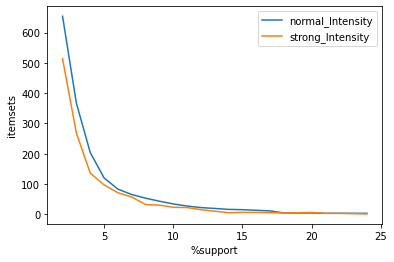

('(0.0262, 0.152]_Std', 'strong_Intensity')
('(0.225, 0.999]_Max', 'strong_Intensity')
('(-1.0, -0.203]_Min', 'strong_Intensity')
('song_Vc', 'normal_Intensity')
('strong_Intensity', 'F')
('strong_Intensity', 'M')
('strong_Intensity', 'speech_Vc')
('F', 'normal_Intensity')
('M', 'normal_Intensity')
('normal_Intensity', 'speech_Vc')
Itemsets counts: 10


In [19]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "normal_Intensity" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "strong_Intensity" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="normal_Intensity")
plt.plot(np.arange(2, max_supp), filter_2, label="strong_Intensity")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

supp=20
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S") #target= frquent/closed/maximal/rules, report=S 
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])
tmp=pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

c=0
for i,s in enumerate(tmp["maximal_itemset"]):
    for x in range(len(s)):
        if s[x] =='normal_Intensity' or  s[x]== 'strong_Intensity':
            print(s)
            c=c+1
print("Itemsets counts:",c)


Support vs number of itemset for vocal_channel

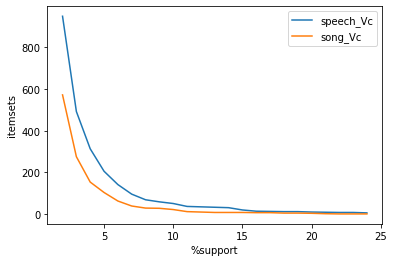

('(4538.0, 6373.0]_Length', 'song_Vc')
('(3604.0, 4004.0]_Length', 'speech_Vc')
('(9.834, 14.095]_Kur', 'speech_Vc')
('(14.095, 59.086]_Kur', 'speech_Vc')
('(-0.000348, 0.00677]_Std', 'speech_Vc')
('(1.7570000000000001, 6.53]_Kur', 'song_Vc')
('(2935.999, 3604.0]_Length', 'speech_Vc')
('song_Vc', 'normal_Intensity')
('strong_Intensity', 'speech_Vc')
('F', 'speech_Vc')
('M', 'speech_Vc')
('normal_Intensity', 'speech_Vc')
Itemsets counts: 12


In [20]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "speech_Vc" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "song_Vc" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="speech_Vc")
plt.plot(np.arange(2, max_supp), filter_2, label="song_Vc")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()



supp = 20  # 20%

itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S") #target= frquent/closed/maximal/rules, report=S 
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])
tmp=pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

c=0
for i,s in enumerate(tmp["maximal_itemset"]):
    for x in range(len(s)):
        if s[x] =='speech_Vc' or  s[x]== 'song_Vc':
            print(s)
            c=c+1
print("Itemsets counts:",c)


Support vs number of itemset for sex

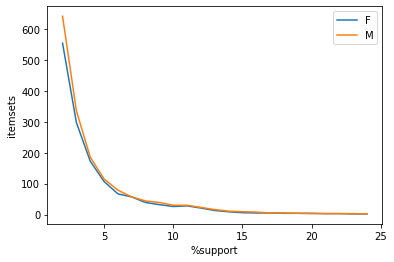

('(14959.0, 30153.0]_Zcs', 'F')
('strong_Intensity', 'F')
('strong_Intensity', 'M')
('F', 'normal_Intensity')
('F', 'speech_Vc')
('M', 'normal_Intensity')
('M', 'speech_Vc')
Itemsets counts: 7


In [21]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "F" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "M" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="F")
plt.plot(np.arange(2, max_supp), filter_2, label="M")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()



supp = 20  # 20%

itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S") #target= frquent/closed/maximal/rules, report=S 
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])
tmp=pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

c=0
for i,s in enumerate(tmp["maximal_itemset"]):
    for x in range(len(s)):
        if s[x] =='F' or  s[x]== 'M':
            print(s)
            c=c+1
print("Itemsets counts:",c)

# RULES

In [22]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [23]:
"""
Se Antecedent= 1st_class allora il 70%(confidence) delle volte fare is between (31.0,512.329]
Se un passenger è female allora il 74% dei passengeri è sopravvissuto

Il lift ci dice la dipendenza tra antecedente e conseguente -> quindi se abbiamo un lift vicino a 1 allora antecedente e conseguente non sono molto dipendenti tra di loro,
quindi confidence della regola è più meno simile alla confidence attesa.

Se lift > 1 allora cè DIPENDENZA tra Head,Tail -> quindi la presenza di first_class ha un effetto positivo sulla presenza di (31.0,512.329]_Fare
quindi il conseguente e antecedente appaiono nel dataset più volte di quanto atteso.

Se lift < 1 allora cè meno dipendenza,quindi negative effect, quindi la regola appare meno volte di quanto atteso

"""
supp=20
conf = 60
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)



,consequent,antecedent,abs_support,%_support,confidence,lift
26,"(-1.0, -0.203]_Min","((0.0262, 0.152]_Std, (0.225, 0.999]_Max)",506,20.935043,0.969349,3.872588
45,"(-0.0544, -0.00613]_Min","((0.0036699999999999997, 0.0554]_Max, (-0.0003...",485,20.066198,0.964215,3.858455
27,"(0.225, 0.999]_Max","((0.0262, 0.152]_Std, (-1.0, -0.203]_Min)",506,20.935043,0.954717,3.820449
65,"(0.225, 0.999]_Max","((-1.0, -0.203]_Min, strong_Intensity)",474,19.611088,0.946108,3.785998
64,"(-1.0, -0.203]_Min","((0.225, 0.999]_Max, strong_Intensity)",474,19.611088,0.946108,3.779740
...,...,...,...,...,...,...
113,speech_Vc,"(strong_Intensity, M)",351,14.522135,0.616872,0.987403
118,speech_Vc,"(M,)",752,31.112950,0.611382,0.978616
24,speech_Vc,"((0.0554, 0.109]_Max,)",367,15.184113,0.607616,0.972588
117,speech_Vc,"(M, normal_Intensity)",401,16.590815,0.606657,0.971052


Rules for consequent=vocal_channel

In [24]:
tmp2=rules_df[(rules_df["consequent"] == "speech_Vc") | (rules_df["consequent"]=="song_Vc")]
print("Rules count:",tmp2.shape[0])
tmp2

Rules count: 33


,consequent,antecedent,abs_support,%_support,confidence,lift
4,song_Vc,"((4538.0, 6373.0]_Length,)",505,20.893670,0.867698,2.312266
7,speech_Vc,"((3604.0, 4004.0]_Length,)",564,23.334712,0.957555,1.532722
18,speech_Vc,"((0.00677, 0.0139]_Std,)",386,15.970211,0.639073,1.022940
21,speech_Vc,"((-1.41e-06, -9.8e-08]_Mean,)",429,17.749276,0.710265,1.136894
24,speech_Vc,"((0.0554, 0.109]_Max,)",367,15.184113,0.607616,0.972588
40,speech_Vc,"((9.834, 14.095]_Kur,)",487,20.148945,0.806291,1.290600
42,speech_Vc,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",414,17.128672,0.853608,1.366338
47,speech_Vc,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",429,17.749276,0.782847,1.253073
51,speech_Vc,"((-0.0544, -0.00613]_Min, (-0.000348, 0.00677]...",447,18.494001,0.862934,1.381266
56,speech_Vc,"((-0.0544, -0.00613]_Min,)",475,19.652462,0.786424,1.258799


Rules for consequent=emotional_intensity

In [25]:
tmp2=rules_df[(rules_df["consequent"] == "normal_Intensity") | (rules_df["consequent"]=="strong_Intensity")]
print("Rules count:",tmp2.shape[0])
tmp2

Rules count: 29


,consequent,antecedent,abs_support,%_support,confidence,lift
11,normal_Intensity,"((-0.104, -0.0544]_Min, (0.0554, 0.109]_Max)",345,14.273893,0.704082,1.309050
14,normal_Intensity,"((-0.104, -0.0544]_Min,)",423,17.501034,0.700331,1.302077
17,normal_Intensity,"((0.00677, 0.0139]_Std,)",411,17.004551,0.680464,1.265139
20,normal_Intensity,"((-1.41e-06, -9.8e-08]_Mean,)",397,16.425321,0.657285,1.222044
23,normal_Intensity,"((0.0554, 0.109]_Max,)",432,17.873397,0.715232,1.329781
25,strong_Intensity,"((0.0262, 0.152]_Std, (0.225, 0.999]_Max, (-1....",437,18.080265,0.863636,1.868764
29,strong_Intensity,"((0.0262, 0.152]_Std, (0.225, 0.999]_Max)",449,18.576748,0.860153,1.861227
34,strong_Intensity,"((0.0262, 0.152]_Std, (-1.0, -0.203]_Min)",450,18.618122,0.849057,1.837216
39,strong_Intensity,"((0.0262, 0.152]_Std,)",487,20.148945,0.806291,1.744679
41,normal_Intensity,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",343,14.191146,0.707216,1.314879


Rules for consequent=sex

In [26]:
tmp2=rules_df[(rules_df["consequent"] == "F") | (rules_df["consequent"]=="M")]
print("Rules count:",tmp2.shape[0])
tmp2

Rules count: 13


,consequent,antecedent,abs_support,%_support,confidence,lift
5,F,"((3604.0, 4004.0]_Length, speech_Vc)",351,14.522135,0.622340,1.267226
6,F,"((3604.0, 4004.0]_Length,)",360,14.894497,0.611205,1.244552
19,F,"((-1.41e-06, -9.8e-08]_Mean,)",402,16.632189,0.665563,1.355236
22,F,"((0.00195, 0.263]_Skew,)",376,15.556475,0.622517,1.267584
57,M,"((10359.0, 12379.0]_Zcs,)",391,16.177079,0.647351,1.272071
60,M,"((14.095, 59.086]_Kur, speech_Vc)",341,14.108399,0.603540,1.185980
61,M,"((14.095, 59.086]_Kur,)",370,15.308233,0.612583,1.203750
72,F,"((14959.0, 30153.0]_Zcs,)",493,20.397187,0.816225,1.662019
83,M,"((-0.001944, -1.41e-06]_Mean,)",407,16.839057,0.672727,1.321936
84,M,"((-2.358, -0.338]_Skew,)",402,16.632189,0.664463,1.305696


Rules for consequent=emotion

In [27]:
supp=5
conf = 50
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)


tmp2=rules_df[(rules_df["consequent"] == "angry_Emotion") | (rules_df["consequent"]=="calm_Emotion") | (rules_df["consequent"]=="disgust_Emotion") | (rules_df["consequent"]=="fearful_emotion") | (rules_df["consequent"]=="happy_Emotion") | (rules_df["consequent"]=="sad_Emotion") | (rules_df["consequent"]=="surprised_Emotion")]
print("Rules count:",tmp2.shape[0])
tmp2

Rules count: 43


,consequent,antecedent,abs_support,%_support,confidence,lift
55,calm_Emotion,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",89,3.682251,0.626761,4.116523
67,calm_Emotion,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",75,3.103020,0.614754,4.037665
69,calm_Emotion,"((-0.0544, -0.00613]_Min, (0.00366999999999999...",100,4.137360,0.621118,4.079463
78,calm_Emotion,"((-0.0544, -0.00613]_Min, (-0.000348, 0.00677]...",78,3.227141,0.629032,4.131443
79,calm_Emotion,"((-0.0544, -0.00613]_Min, (-0.000348, 0.00677]...",93,3.847745,0.628378,4.127148
88,calm_Emotion,"((-0.0544, -0.00613]_Min, strong_Intensity, sp...",79,3.268515,0.607692,3.991283
91,calm_Emotion,"((-0.0544, -0.00613]_Min, strong_Intensity)",107,4.426976,0.622093,4.085866
131,calm_Emotion,"((0.0036699999999999997, 0.0554]_Max, (-0.0003...",74,3.061647,0.601626,3.951440
132,calm_Emotion,"((0.0036699999999999997, 0.0554]_Max, (-0.0003...",89,3.682251,0.605442,3.976505
142,calm_Emotion,"((0.0036699999999999997, 0.0554]_Max, strong_I...",77,3.185767,0.587786,3.860542


Association Rules extraction and discuss rules

In [43]:
res = []
for support in range(5, 21):
    for confidence in range(40, 91):
        itemsets = apriori(X, supp=support, zmin=4, target='r', conf=confidence, report='aSCl', mode='o')
        for e in itemsets: 
            res.append({
                'support': e[3],
                'confidence': e[4],
                'lift': e[5]
            })
         
df_rules_conf = pd.DataFrame(res)
df_rules_conf = df_rules_conf[df_rules_conf["lift"]>1]
df_rules_conf


,support,confidence,lift
0,6.040546,81.564246,1.305568
1,6.040546,98.648649,3.941054
2,6.040546,94.193548,3.763071
3,6.040546,99.319728,3.974433
4,7.405875,90.862944,3.630012
...,...,...,...
172297,18.080265,97.111111,3.886052
172298,18.080265,92.194093,3.689290
172299,18.080265,97.327394,3.888270
172300,18.080265,97.111111,3.886052


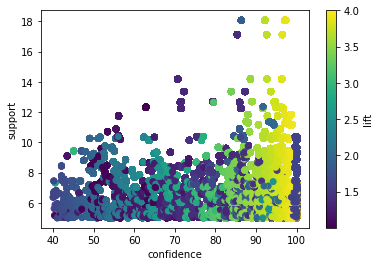

In [44]:
plt.scatter(df_rules_conf['confidence'], df_rules_conf['support'], c=df_rules_conf['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

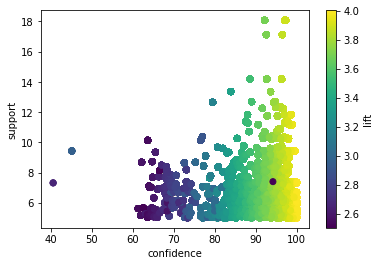

In [45]:

x = df_rules_conf[df_rules_conf["lift"]>2.5]
plt.scatter(x ['confidence'], x ['support'], c=x ['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

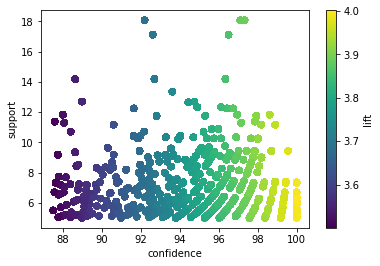

In [46]:
x = df_rules_conf[df_rules_conf["lift"]>3.5]
plt.scatter(x ['confidence'], x ['support'], c=x ['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()

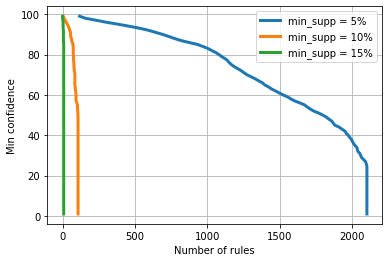

In [47]:
min_sup = {}
confidence_ll = [i for i in range(1, 100)]
support_ll = [5, 10, 15]
for support in support_ll:
    rules_ll = []
    for confidence in confidence_ll:
        rules = apriori(X, supp = support, zmin = 4, target = "r", conf=confidence, report='aSCl', mode='o')
        rules_ll.append(len(rules))
    min_sup[str(support)] = rules_ll


to_def = {"5": "min_supp = 5%", "10": "min_supp = 10%", "15": "min_supp = 15%"}
for support in support_ll:
    tmp_len = min_sup[str(support)]
    plt.plot(tmp_len, confidence_ll,label=to_def[str(support)],lw=3)
plt.xlabel("Number of rules")#,fontsize=22)
plt.ylabel("Min confidence")#,fontsize=22)
plt.legend()
plt.grid()
plt.show()

In [65]:
def extractRules(baskets, support, confidence):
    rules = apriori(baskets, supp=support, zmin=4, target='r', conf=confidence, report='aSCl', mode='o')
    df_rules_conf = pd.DataFrame(rules, columns=["conseq","antecedent","support_abs","support_perc","confidence","lift"])
    
    print("*** Numero di regole con:")
    print("- Lift > 1:", len(df_rules_conf[df_rules_conf["lift"]>1]))
    print("- Lift = 1:",len(df_rules_conf[df_rules_conf["lift"]==1]))
    print("- Lift < 1:", len(df_rules_conf[df_rules_conf["lift"]<1]))

    #fig = plt.figure(figsize= (25,10))

    plt.hist(df_rules_conf["lift"])
    plt.xlabel('lift')
    
    plt.show()
    
    plt.hist(df_rules_conf["confidence"])
    plt.xlabel('confidence')
    
    return df_rules_conf

*** Numero di regole con:
- Lift > 1: 1507
- Lift = 1: 0
- Lift < 1: 15


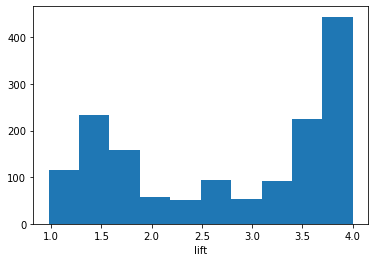

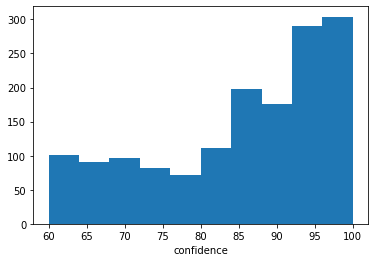

In [70]:
x = extractRules(X, 5, 60)

*** Numero di regole con:
- Lift > 1: 8
- Lift = 1: 0
- Lift < 1: 0


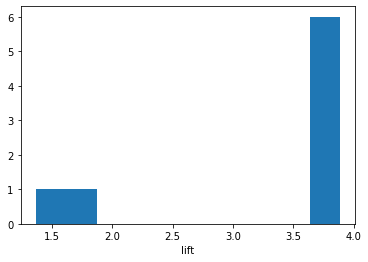

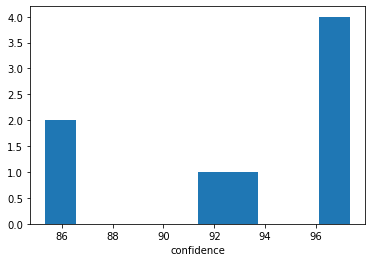

In [87]:
x = extractRules(X, 15, 85) #10-85

In [88]:
for i in x.values:
    if(i[5] > 1):
        print("****** Regola:")
        print(str(i[1]) + " => "+str(i[0]))
        print("**** Support: " + str(i[3]) + " Confidence: "+ str(i[4]) + " Lift: " + str(i[5]))

****** Regola:
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(-1.0, -0.203]_Min') => strong_Intensity
**** Support: 18.080264791063303 Confidence: 86.36363636363636 Lift: 1.8687637340278342
****** Regola:
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', 'strong_Intensity') => (-1.0, -0.203]_Min
**** Support: 18.080264791063303 Confidence: 97.32739420935413 Lift: 3.8882696165951884
****** Regola:
('(0.0262, 0.152]_Std', '(-1.0, -0.203]_Min', 'strong_Intensity') => (0.225, 0.999]_Max
**** Support: 18.080264791063303 Confidence: 97.11111111111111 Lift: 3.8860522442972774
****** Regola:
('(0.225, 0.999]_Max', '(-1.0, -0.203]_Min', 'strong_Intensity') => (0.0262, 0.152]_Std
**** Support: 18.080264791063303 Confidence: 92.19409282700421 Lift: 3.6892901053455165
****** Regola:
('(-0.0544, -0.00613]_Min', '(0.0036699999999999997, 0.0554]_Max', '(-0.000348, 0.00677]_Std') => speech_Vc
**** Support: 17.128671907323127 Confidence: 85.36082474226804 Lift: 1.366338499351403
****** Regola:
('(-0.0544,

*** Numero di regole con:
- Lift > 1: 90
- Lift = 1: 0
- Lift < 1: 3


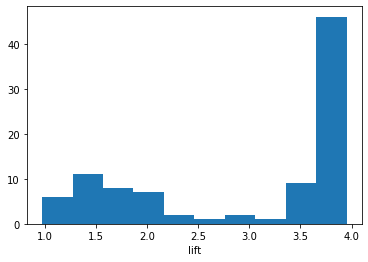

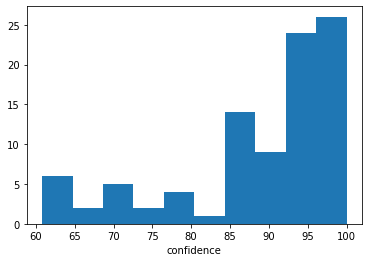

In [94]:
x = extractRules(X, 10, 60)

In [95]:
# analisi regole generate con lift > 1

for i in x.values:
    if(i[5] > 1):
        print("****** Regola:")
        print(str(i[1]) + " => "+str(i[0]))
        print("**** Support: " + str(i[3]) + " Confidence: "+ str(i[4]) + " Lift: " + str(i[5]))

****** Regola:
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(14959.0, 30153.0]_Zcs') => (-1.0, -0.203]_Min
**** Support: 10.260653702937526 Confidence: 98.02371541501977 Lift: 3.9160879364975663
****** Regola:
('(0.0262, 0.152]_Std', '(14959.0, 30153.0]_Zcs', '(-1.0, -0.203]_Min') => (0.225, 0.999]_Max
**** Support: 10.260653702937526 Confidence: 95.75289575289575 Lift: 3.831701142959421
****** Regola:
('(0.225, 0.999]_Max', '(14959.0, 30153.0]_Zcs', '(-1.0, -0.203]_Min') => (0.0262, 0.152]_Std
**** Support: 10.260653702937526 Confidence: 95.38461538461539 Lift: 3.816963830871116
****** Regola:
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', '(-1.0, -0.203]_Min', 'F') => strong_Intensity
**** Support: 10.219280099296649 Confidence: 86.97183098591549 Lift: 1.8819240420139458
****** Regola:
('(0.0262, 0.152]_Std', '(0.225, 0.999]_Max', 'strong_Intensity', 'F') => (-1.0, -0.203]_Min
**** Support: 10.219280099296649 Confidence: 98.01587301587301 Lift: 3.915774629410993
****** Regola:
('(0.